# Análisis exploratorio - Identificación de firmas transcriptómicas asociadas a metástasis cerebral en cáncer de mama HER2+ mediante análisis de microarrays

El cáncer de mama **HER2 positivo** constituye un subtipo clínicamente relevante debido a su alta agresividad y a la elevada incidencia de **metástasis cerebrales**, una complicación que impacta de forma negativa en la supervivencia de los pacientes. A pesar de los avances terapéuticos, persiste la necesidad de identificar **biomarcadores capaces de predecir la propensión metastásica** hacia el sistema nervioso central.

En este estudio se emplearon datos transcriptómicos de **microarrays** disponibles públicamente en el repositorio GEO del NCBI (**GSE43837**), generados por el grupo de **Vareslija et al. (2013)** y publicados en *Breast Cancer Research*. Dichos datos incluyen muestras de **tumores primarios de mama** y **metástasis cerebrales HER2+**, lo que permite evaluar la expresión diferencial de genes y explorar **firmas génicas** relacionadas con la progresión metastásica.

El análisis inicial se realizó con **GEO2R**, una herramienta basada en R que facilita la comparación entre grupos de muestras y genera estadísticas de expresión diferencial (**valores p y p ajustados**). Posteriormente, los resultados fueron procesados en **Python** utilizando bibliotecas como **pandas, NumPy y Matplotlib**, lo que permitió filtrar genes significativos, visualizar patrones de expresión y calcular puntuaciones asociadas a **firmas transcriptómicas**.

La **firma BD-L**, identificada por Vareslija et al., refleja un patrón de expresión similar al observado en tumores con **deficiencia funcional de BRCA1**. Esta firma ha demostrado correlacionar con la presencia de **metástasis cerebrales**, **recurrencia tumoral** y respuesta a **inhibidores de PARP y temozolomida** en modelos de líneas celulares. Por lo tanto, el análisis de este dataset permite explorar la expresión diferencial de genes individuales y combinaciones de genes clave, evaluando la aplicabilidad de la **firma BD-L** en la identificación de pacientes de alto riesgo.

Aunque no se identificaron genes con significancia tras corrección por valor p ajustado, se detectaron **20 posibles biomarcadores con cambios de expresión relevantes (logFC significativo)**, que podrían resultar de interés para su **validación experimental**. Adicionalmente, de los 61,359 transcritos detectados, 12,499 no fueron identificados, siendo posible que algunos correspondan a **antígenos tumorales específicos** derivados de transcripciones no canónicas, alteraciones epigenéticas, cambios de marco de lectura, empalmes aberrantes o fusiones génicas.  

### Genes Identificados

Como resultado del análisis exploratorio, se identificaron 20 genes con cambios de expresión relevantes que podrían constituir posibles biomarcadores asociados a la progresión metastásica. Entre estos destacan:

**COL10A1, ATP6V0C, ZNF391, PPM1H, RGL3, HSD17B4, PSMD5-AS1, ASPN, COL3A1, DNTT, TMEM185A, UBR2, CCL13, SERPINB13, POSTN, IL21R, HERC6, TAS2R41 y BRD8**

Estos genes presentan **variaciones significativas en su expresión** y podrían contribuir a caracterizar **firmas transcriptómicas asociadas a riesgo elevado de metástasis cerebral** en cáncer de mama HER2+. Estos hallazgos proporcionan un punto de partida para **futuras validaciones experimentales y estudios funcionales** que exploren su potencial como **biomarcadores predictivos o dianas terapéuticas**.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv(r'C:\Users\HP\Desktop\Análisis omicos\Análisis exploratorio - Identificación de firmas transcriptómicas asociadas a metástasis cerebral en cáncer de mama HER2+ mediante análisis de microarrays\ArrayExpress.tsv', sep='\t')
data.head()

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title
0,Hs2.356894.1.S1_3p_at,0.112,0.000003,-5.345971,3.72582,-2.259748,HSD17B4,hydroxysteroid 17-beta dehydrogenase 4
1,Hs.21894.0.S1_3p_at,0.112,0.000007,5.115627,3.12569,2.627438,PPM1H,"protein phosphatase, Mg2+/Mn2+ dependent 1H"
2,Hs.179729.1.S1_3p_a_at,0.112,0.000008,-5.073799,3.01693,-3.509618,COL10A1,collagen type X alpha 1 chain
3,g8924121_3p_at,0.112,0.000010,-5.020891,2.87949,-1.946722,NaN,NaN
4,Hs2.407059.2.S1_3p_at,0.112,0.000010,-5.018803,2.87407,-1.709881,ZNF391,zinc finger protein 391


In [ ]:
data.shape

(61359, 8)

In [ ]:
filtrados = data[data['adj.P.Val'] < 0.01]
filtrados['logFC'].min()

nan

In [ ]:
filtrados['logFC'].max()

nan

In [ ]:
data['adj.P.Val'].min()

0.112

In [ ]:
data['adj.P.Val'].max()

1.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61359 entries, 0 to 61358
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           61359 non-null  object 
 1   adj.P.Val    61359 non-null  float64
 2   P.Value      61359 non-null  float64
 3   t            61359 non-null  float64
 4   B            61359 non-null  float64
 5   logFC        61359 non-null  float64
 6   Gene.symbol  48860 non-null  object 
 7   Gene.title   48860 non-null  object 
dtypes: float64(5), object(3)
memory usage: 3.7+ MB


Text(0.5, 1.0, 'Distribución del valor P ajustado')

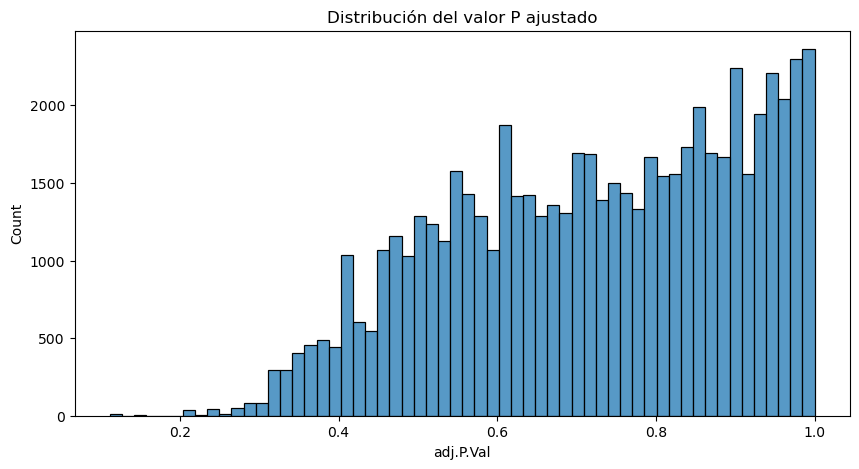

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data['adj.P.Val'])
plt.title("Distribución del valor P ajustado")

Text(0.5, 1.0, 'Distribución del valor P')

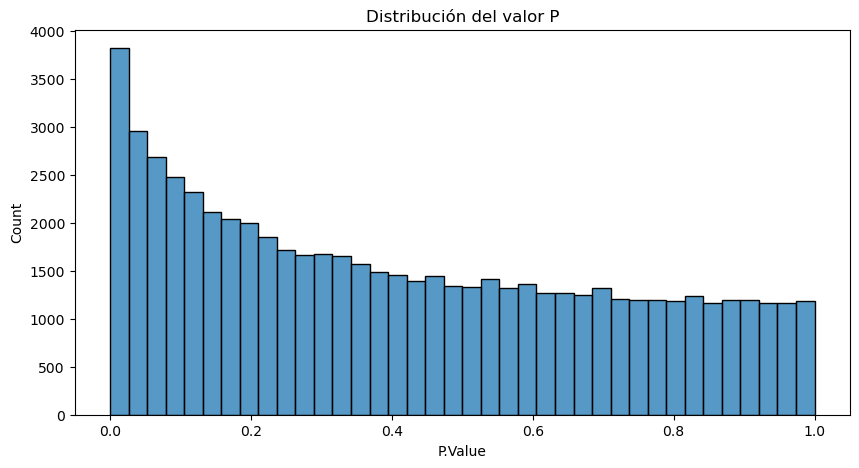

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data['P.Value'])
plt.title("Distribución del valor P")

Text(0.5, 1.0, 'Distribución del logFC')

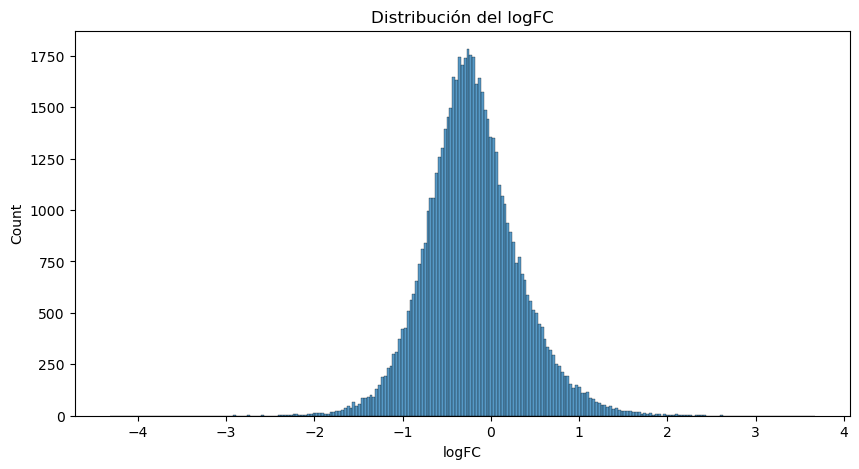

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data['logFC'])
plt.title("Distribución del logFC")

In [ ]:
data[data['adj.P.Val'] <= .15].count()

ID             10
adj.P.Val      10
P.Value        10
t              10
B              10
logFC          10
Gene.symbol     8
Gene.title      8
dtype: int64

In [ ]:
data[data['adj.P.Val'] <= .12].count()

ID             9
adj.P.Val      9
P.Value        9
t              9
B              9
logFC          9
Gene.symbol    7
Gene.title     7
dtype: int64

In [ ]:
data[data['Gene.symbol'] == 'BRCA1']


,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title
26834,g6552300_3p_a_at,0.704,0.308044,1.031607,-5.13471,0.404521,BRCA1,"BRCA1, DNA repair associated"
57379,g2218153_3p_a_at,0.974,0.911054,-0.112371,-5.59408,-0.059585,BRCA1,"BRCA1, DNA repair associated"


In [ ]:
data.sort_values(by ='adj.P.Val', ascending=True).head(20)

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title
0,Hs2.356894.1.S1_3p_at,0.112,0.000003,-5.345971,3.72582,-2.259748,HSD17B4,hydroxysteroid 17-beta dehydrogenase 4
1,Hs.21894.0.S1_3p_at,0.112,0.000007,5.115627,3.12569,2.627438,PPM1H,"protein phosphatase, Mg2+/Mn2+ dependent 1H"
2,Hs.179729.1.S1_3p_a_at,0.112,0.000008,-5.073799,3.01693,-3.509618,COL10A1,collagen type X alpha 1 chain
3,g8924121_3p_at,0.112,0.000010,-5.020891,2.87949,-1.946722,NaN,NaN
8,Hs2.418724.1.S1_3p_s_at,0.112,0.000016,-4.853285,2.44527,-2.192530,RGL3,ral guanine nucleotide dissociation stimulator...
6,4901150C_3p_at,0.112,0.000014,4.910260,2.59265,1.666746,ATP6V0C,ATPase H+ transporting V0 subunit c
7,Hs.21894.0.S1_3p_x_at,0.112,0.000015,4.878956,2.51165,2.375063,PPM1H,"protein phosphatase, Mg2+/Mn2+ dependent 1H"
5,Hs.287465.0.S1_3p_at,0.112,0.000011,-4.968023,2.74232,-2.745566,NaN,NaN
4,Hs2.407059.2.S1_3p_at,0.112,0.000010,-5.018803,2.87407,-1.709881,ZNF391,zinc finger protein 391
9,1555892_3p_s_at,0.148,0.000024,-4.735522,2.14151,-2.182486,PSMD5-AS1,PSMD5 antisense RNA 1 (head to head)


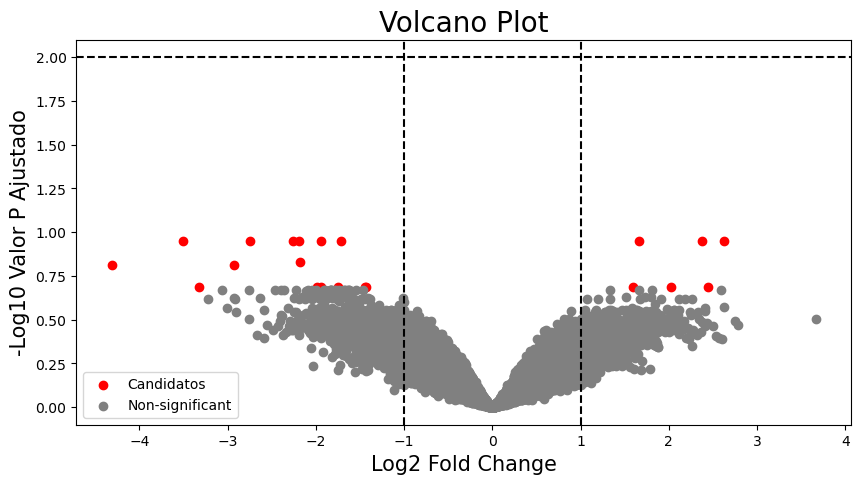

In [ ]:
# Identificar las filas (es decir, genes) en el DataFrame donde el valor p ajustado es menor a 0.01 y
# el valor absoluto del log2 fold change es mayor a 1.
# Estos genes se consideran diferencialmente expresados de manera significativa.
# abs(df['logFC']) devuelve una Serie con el valor absoluto del log2 fold change para cada gen.
sig = data.loc[(data['adj.P.Val'] <= 0.205) & (abs(data['logFC']) > 1)]

# Identificar las filas en el DataFrame que no fueron marcadas como significativas en el paso anterior.
# ~df.index.isin(sig.index) crea una máscara booleana donde las filas que están en sig son marcadas como False.
# Seleccionamos las filas en df donde la máscara es True, es decir, las filas que no están en sig.
non_sig = data.loc[~data.index.isin(sig.index)]

# Crear una nueva figura para el gráfico con un tamaño específico (10 unidades de ancho por 5 de alto).
plt.figure(figsize=(10, 5))

# Crear un diagrama de dispersión (scatter plot) para los genes diferencialmente expresados de manera significativa.
# El eje x es el log2 fold change y el eje y es el -log10 del valor p ajustado.
# Los puntos se colorean en rojo y se etiquetan como 'Significant'.
plt.scatter(sig['logFC'], -np.log10(sig['adj.P.Val']), color='red', label='Candidatos')

# Hacer lo mismo para los genes no significativos, pero colorear los puntos en gris y etiquetarlos como 'Non-significant'.
plt.scatter(non_sig['logFC'], -np.log10(non_sig['adj.P.Val']), color='grey', label='Non-significant')

# Agregar una línea horizontal en el valor de -log10 del umbral de valor p ajustado (0.01).
# Esta línea ayuda a visualizar el punto de corte para la significancia estadística basada en el valor p ajustado.
plt.axhline(y=-np.log10(0.01), color='black', linestyle='--')

# Agregar líneas verticales en los umbrales de log2 fold change (-1 y 1).
# Estas líneas ayudan a visualizar el punto de corte para la significancia basada en el fold change.
plt.axvline(x=-1, color='black', linestyle='--')
plt.axvline(x=1, color='black', linestyle='--')

# Configurar las etiquetas de los ejes x e y, y el título del gráfico.
plt.xlabel('Log2 Fold Change', fontsize=15)
plt.ylabel('-Log10 Valor P Ajustado', fontsize=15)
plt.title('Volcano Plot', fontsize=20)

# Mostrar una leyenda que mapea el color de los puntos con sus etiquetas ('Significant' y 'Non-significant').
plt.legend(loc='best')

# Mostrar el gráfico.
plt.show()

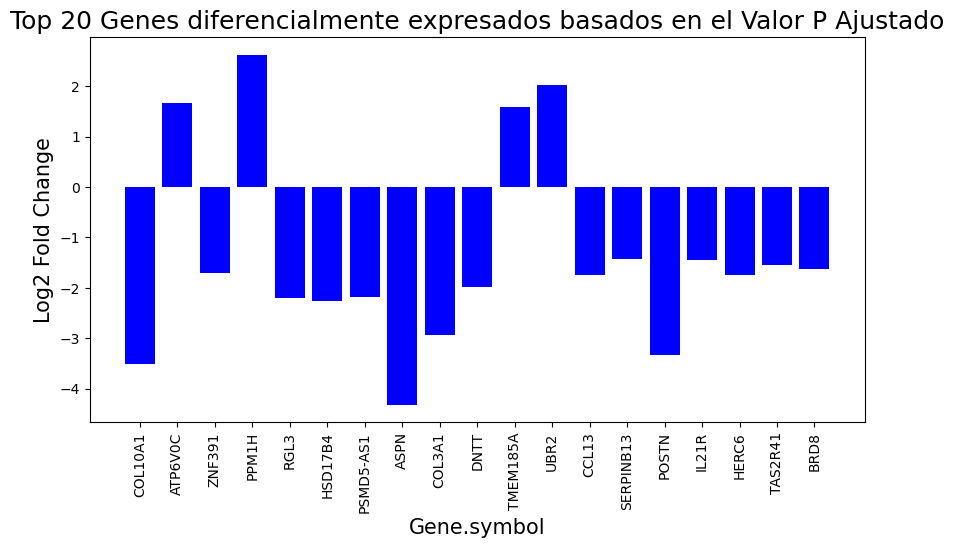

In [ ]:
data_f = data.dropna(subset=['Gene.symbol'])

# Esta línea ordena el DataFrame por la columna 'adj.P.Val' en orden ascendente.
# Esto significa que las filas con valores más pequeños de 'adj.P.Val' (es decir, genes más estadísticamente significativos) aparecerán primero.
# El DataFrame ordenado se guarda en un nuevo DataFrame llamado 'df_sorted'.
df_sorted = data_f.sort_values(by='adj.P.Val', ascending=True)

# La función 'head' devuelve las primeras n filas de un DataFrame. Aquí, tomamos las primeras 20 filas.
# Como 'df_sorted' está ordenado por 'adj.P.Val', estas son los 20 genes más estadísticamente significativos.
# Este nuevo subconjunto del DataFrame se guarda en 'top_genes'.
top_genes = df_sorted.head(20)

# 'plt.figure' se usa para crear una nueva figura para graficar. El argumento 'figsize' define el tamaño de la figura.
# Aquí, hacemos una figura de 10 unidades de ancho y 5 de alto.
plt.figure(figsize=(10,5))

# 'plt.bar' crea un gráfico de barras. Toma dos argumentos: los valores en x y los valores en y para las barras.
# Usamos 'miRNA_ID' para los valores en el eje x (las etiquetas de las barras) y 'logFC' para los valores en el eje y (la altura de las barras).
# También establecemos el color de las barras en azul.
plt.bar(top_genes['Gene.symbol'], top_genes['logFC'], color='blue')

# 'plt.xlabel' y 'plt.ylabel' se usan para establecer las etiquetas de los ejes x e y. 
# Aquí, los etiquetamos como 'miRNA ID' y 'Log2 Fold Change'.
plt.xlabel('Gene.symbol', fontsize=15)
plt.ylabel('Log2 Fold Change', fontsize=15)

# 'plt.xticks' se usa para modificar las marcas del eje x. El argumento 'rotation' rota las etiquetas de las marcas por un cierto ángulo.
# Aquí, rotamos las etiquetas del eje x en 90 grados para que queden verticales. Esto se hace para evitar que se encimen las etiquetas.
plt.xticks(rotation=90)

# 'plt.title' se usa para establecer el título del gráfico.
plt.title('Top 20 Genes diferencialmente expresados basados en el Valor P Ajustado', fontsize=18)

# Finalmente, 'plt.show()' se usa para mostrar el gráfico. 
# Sin esta línea, el gráfico se crearía internamente pero no se mostraría.
plt.show()

In [ ]:
for gene in top_genes['Gene.symbol']:
    print(gene)

COL10A1
ATP6V0C
ZNF391
PPM1H
RGL3
HSD17B4
PPM1H
PSMD5-AS1
ASPN
COL3A1
DNTT
TMEM185A
UBR2
CCL13
SERPINB13
POSTN
IL21R
HERC6
TAS2R41
BRD8
